<a href="https://colab.research.google.com/github/evanlin917/titanicML/blob/main/titanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving titanic_train.csv to titanic_train (12).csv
<bound method NDFrame.head of      pclass     sex   age  sibsp  parch     fare  survived
1         3    male  38.0      0      0   8.6625         0
2         3  female  30.0      1      1  24.1500         0
3         2  female  54.0      1      3  23.0000         1
4         2    male  40.0      0      0  13.0000         0
5         3    male  28.0      0      0  22.5250         0
..      ...     ...   ...    ...    ...      ...       ...
845       1    male  55.0      0      0  50.0000         0
846       1    male  58.0      0      0  29.7000         0
847       2  female  24.0      1      0  26.0000         1
848       3  female   3.0      1      1  13.7750         0
849       2    male  52.0      0      0  13.0000         0

[675 rows x 7 columns]>
<bound method NDFrame.head of      pclass     sex   age  sibsp  parch     fare  survived   male
1         3    male  38.0      0      0   8.6625         0   True
2         3  female  30.

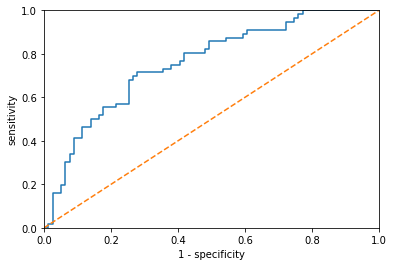

0.7583634719710669


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#allows a file to be uploaded to Google Colab directly from the computer
from google.colab import files
uploaded = files.upload()

#using pandas to create a DataFrame to organize the data
df = pd.read_csv("titanic_train.csv")
df = df.drop("passenger_id", axis = 'columns')
df = df.drop("name", axis = 'columns')
df = df.drop("ticket", axis = 'columns')
df = df.drop("embarked", axis = 'columns')
df = df.drop("cabin", axis = 'columns')
df = df.drop("boat", axis = 'columns')
df = df.drop("body", axis = 'columns')
df = df.drop("home.dest", axis = 'columns')
df = df.dropna(subset = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'])
print(df.head)

#creates a new column in the DataFrame with boolean values denoting if certain passengers are male or female
df['male'] = df['sex'] == 'male'
print(df.head)

#defining the feature matrix and creating a NumPy array to hold the data of the DataFrame
x = df[['pclass', 'male', 'age', 'sibsp', 'parch', 'fare']].values
print(x)

#defining the target and creating a NumPy array to hold the data of the DataFrame
y = df['survived'].values
print(y)

#importing the Logistic Regression model from Scikit-Learn
from sklearn.linear_model import LogisticRegression

#creating the logistic regression ML model
model = LogisticRegression()
model.fit(x,y)

#determining the coefficients surrounding the line-of-best-fit
print(model.coef_, model.intercept_)

#predicting if certain passengers will survive given inputs of class, male/female, age, siblings/spouses, parents/children, and fare
print(model.predict([[3, True, 38.0, 0, 0, 8.6625]])) #first passenger

#predicting the survivability of the first five passengers and comparing it to the real survivability rates
print(model.predict(x[:5]))
print(y[:5])

#creating an array of predicted y values
y_pred = model.predict(x)

#comparing to see if each prediction is correct and printing the number of correct predictions
y == y_pred
print((y == y_pred).sum())

#determining the percentage of accuracy employed by the model
y.shape[0] #gives the total number of data points in the set
print((y == y_pred).sum() / y.shape[0])
print(model.score(x, y)) #alternative way of getting the accuracy

#calculating the evaluation metrics of the model: accuracy, precision, recall, and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy: ", accuracy_score(y, y_pred))
print("precision: ", precision_score(y, y_pred))
print("recall: ", recall_score(y, y_pred))
print("f1 score: ", f1_score(y, y_pred))

#outputting the confusion matrix of the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

#dividing the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 27) #setting training size to 80% and test size to be 20%
print("whole dataset: ", x.shape, y.shape)
print("training set: ", x_train.shape, y_train.shape)
print("test set: ", x_test.shape, y_test.shape)

#re-applying the Logistic Regression model towards the training and test datasets
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

#sensitivity score is the same as the recall score
from sklearn.metrics import recall_score
sensitivity_score = recall_score
print(sensitivity_score(y_test, y_pred))

#defining a function to output specificity score
def specificity_score(y_true, y_pred):
  p, r, f, s = precision_recall_fscore_support(y_true, y_pred)
  return r[0]

#choosing the threshold of the Logistic Regression model to be equal to 0.75
model = LogisticRegression()
model.fit(x_train, y_train)
print("predict proba: ")
print(model.predict_proba(x_test))
y_pred = model.predict_proba(x_test)[:, 1] > 0.75
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))

#creating a ROC curve comparing specificity against sensitivity
from sklearn.metrics import roc_curve
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred_proba = model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

#calculating the area under the curve for the ROC curve recently plotted
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_proba[:, 1]))